<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
# Get the file into Colab
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-07-11 22:25:05--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.51M   833KB/s    in 27s     

2019-07-11 22:25:32 (830 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22559146]



In [2]:
# Unzip it
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
# Bash command to check out the head
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
# Tail also works
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4543.48","4543.48","1511.13","1511.13","1056.52","454.61","0.0","0.0","0.0","Jun-2019","190.21","Jul-2019","Jun-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
# Import pandas and set the display to show all the rows and not truncate
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
# Read into df, skip top row and bottom two, also telling it to use the python engine bec it raised a warning
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
# Check it out
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0

In [5]:
# Use lambda function to strip whitespace and capitalize if its a string and then copy to another df
df_cleaned = df.apply(lambda x: x.strip().title() if isinstance(x, str))

SyntaxError: ignored

In [0]:
# .T will flip the columns and rows - usefull when its alot of columns
df.head().T

In [8]:
# Check out the shape
df.shape

(128412, 144)

In [0]:
# Look at the sum of the null values by column, in descending order
df.isnull().sum().sort_values(ascending=False)

In [0]:
# New df with columns full of NaNs dropped
df_dropped = df.drop(['id', 'url', 'desc', 'member_id'], axis='columns')

## Work with strings

In [0]:
# Inspect our data types
df.dtypes

In [0]:
# Check out the interest rate column to see why they are strings
df['int_rate'].T

In [27]:
# Pracice fixing a string
float('17.97%'.strip('%'))

17.97

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
# did this above with df.dtypes

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
# Func to remove the % signs and turn into float
def remove_percent(s):
  if isinstance(s, str):
    return float(s.strip('%'))
  else:
    return s

In [0]:
# Change int_rate column to floats
df['int_rate'] = df['int_rate'].apply(remove_percent)
df['int_rate']

In [0]:
# Same thing using list comprehension instead of func
[remove_percent(s) for s in df['int_rate']]

Apply the function to the `int_rate` column

In [13]:
# Checking that it worked
type(df['int_rate'][2])

numpy.float64

### Clean `emp_title`

Look at top 20 titles

In [0]:
# Inspect out first 20 emp_title values
df['emp_title'].head(20)

In [15]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [16]:
# Check how many null values we have
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [0]:
import numpy as np

In [0]:
# sample list to play with
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [20]:
# Func to capitalize first letter of each job title and change NaNs to unknown
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'
# Check to make sure it worked 
[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [21]:
# Change the values to be cleaned up (could still clean further by using a dict to map same jobs together)
df['emp_title'] = df['emp_title'].apply(clean_title)
# Check how many of each job we got, top 20
df['emp_title'].value_counts(dropna=False).head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [87]:
# The kind of dict you would use to merge same jobs
[{'Nurse': ['Registered Nurse', 'Rn', 'Nurse']}, {'Manager': ['Sales Manager', 'General Manager']}]

[{'Nurse': ['Registered Nurse', 'Rn', 'Nurse']},
 {'Manager': ['Sales Manager', 'General Manager']}]

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
# Create new column that says whether or not someone is manager
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head().T

In [0]:
# variables splitting up managers and non-managers
managers = df[df['emp_title_manager'] == True]
plebs = df[df['emp_title_manager'] == False]


In [0]:
import seaborn as sns

In [25]:
# convert managers int_rate to float
managers['int_rate'] = managers['int_rate'].apply(remove_percent)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Check that it worked
managers['int_rate']

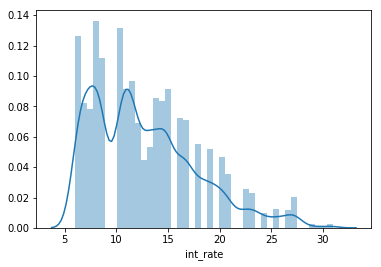

In [26]:
# Plot it!
sns.distplot(managers['int_rate'])

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# Inspect our term column
df['term']

# we need to remove the word months and convert it to int

In [0]:
# Test our function to make sure it works
s = '46 months'

def fix_months(s):
  s = s.split()
  return int(s[0])
  

s = fix_months(s)

In [0]:
# Apply our func to the df column
df['term'] = df['term'].apply(fix_months)

In [0]:
# Inspect our loan status column
df['loan_status']

In [0]:
# New column loan_status_is_great with values as true and false
df['loan_status_is_great'] = (df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Current')
df['loan_status_is_great']

In [0]:
# Func to change bools to 1 or 0
def good_or_bad(b):
  if b:
    b = 1
  else:
     b = 0
  return b

In [33]:
# Check its working
b = True

good_or_bad(b)

1

In [0]:
# List comprehension to apply func to column.
df['loan_status_is_great'] = [good_or_bad(b) for b in df['loan_status_is_great']]

In [0]:
# Check to make sure it worked
df['loan_status_is_great']

In [0]:
df['last_pymnt_d'].isnull().sum()

In [0]:
# Convert our last payment date column to datetime format
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)
df['last_pymnt_d']

In [0]:
# New column that tells us the year the payment ends
df['last_pymnt_yr'] = df['last_pymnt_d'].dt.year
# Check that it worked
df['last_pymnt_yr']

In [0]:
# See if we have NaNs in column
df['last_pymnt_yr'].isnull().sum()

In [0]:
# Forward fill our NaNs
df['last_pymnt_yr'] = df['last_pymnt_yr'].fillna(method='ffill')
df['last_pymnt_yr'].isnull().sum()

In [0]:
# CHange to an int
df['last_pymnt_yr'].astype(int)

In [0]:
# Create new column for last payment month
df['last_pymnt_month'] = df['last_pymnt_d'].dt.month
# Check that it worked
df['last_pymnt_month']

In [0]:
# Check for NaN values
df['last_pymnt_month'].isnull().sum()

In [0]:
# Forward fill our NaNs again
df['last_pymnt_month'] = df['last_pymnt_month'].fillna(method='ffill')
df['last_pymnt_month'].isnull().sum()

In [0]:
# Cast as int
df['last_pymnt_month'].astype(int)

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# How many NaNs in this column
df['revol_util'].isnull().sum()

In [0]:
# Remove percent signs and convert to float, left NaN values as is
df['revol_util'] = df['revol_util'].apply(remove_percent)

In [0]:
# Summary statistics to decide how to fillna
df['revol_util'].describe()

In [0]:
# Fillna with the median value - I messed this up bec i first did it with mean so then there 
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['revol_util']

In [0]:
# Checking if median values = NaN values from before. This is when I realized it didnt work as intended
(df['revol_util'] == df['revol_util'].median()).value_counts()

In [0]:
# Check that we are indeed floats
df['revol_util'].dtypes

In [58]:
# Looking at our top 20 values
df['emp_title'].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
# Let's merge some that are the same

# First make a dict to map them to the same string
jobs_dict = {'Nurse': ['Registered Nurse', 'Rn', 'Nurse']}

In [0]:
# Func to convert all types of managers to the same title
def everyones_a_manager(s):
  if 'manager' in s.lower():
    s = "Manager"
  return s

In [0]:
# Apply the func
df['emp_title'] = df['emp_title'].apply(everyones_a_manager)\
# Check that it worked
df['emp_title'].value_counts().head(20)

In [74]:
df['emp_title'] = df['emp_title'].replace(['Registered Nurse', 'Rn', 'Nurse'], 'RN')
df['emp_title'].value_counts().head(20)

Unknown                     20947
Manager                     17885
RN                           2677
Teacher                      2557
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Sales                         803
Owner                         625
Director                      523
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Mechanic                      391
Server                        357
Vice President                352
Accountant                    335
Electrician                   302
Foreman                       302
Name: emp_title, dtype: int64

In [0]:
# A list of the top 20 jobs
top_jobs = df['emp_title'].value_counts().head(20).index.tolist()

In [0]:
# Check our list
top_jobs

In [0]:
# Func to replace all jobs not in top 20 with other
def replace_others(string):
  if string not in top_jobs:
    return 'Other'
  else:
    return string

In [0]:
# Apply our func to our column
df['emp_title'].apply(replace_others)

In [0]:
# Check that it worked - it only partially did
df['emp_title'].value_counts()

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01